In [1]:
pip install twstock

Note: you may need to restart the kernel to use updated packages.


In [2]:
twstock -b 2330 6223

SyntaxError: invalid syntax (<ipython-input-2-420c27ff9c9d>, line 1)

In [3]:
import twstock

In [4]:
twstock -b 2330 6223

SyntaxError: invalid syntax (<ipython-input-4-420c27ff9c9d>, line 1)

In [5]:
twstock -s 2330 6223

SyntaxError: invalid syntax (<ipython-input-5-3b319e489b7e>, line 1)

In [6]:
s 2330 6223

SyntaxError: invalid syntax (<ipython-input-6-bda6318e466b>, line 1)

In [7]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
import pybacktest

ModuleNotFoundError: No module named 'talib'

In [8]:
pip install tabil

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tabil
ERROR: No matching distribution found for tabil


In [9]:
pip install talib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement talib
ERROR: No matching distribution found for talib


In [10]:
plt.rcParams.update({
    'font.family': ['Microsoft JhengHei'],
    'figure.autolayout': True,
    'axes.unicode_minus': True,
    'savefig.dpi': 100,
    'figure.dpi': 100

SyntaxError: unexpected EOF while parsing (<ipython-input-10-f2a94a5d829a>, line 6)

In [11]:
import csv
fn='STOCK_DAY_ALL_20211122.csv'
with open(fn,encoding='utf8')as csvFile:
    csvReader=csv.reader(csvFile)
    listReport=list(csvReader)
print(listReport)  

FileNotFoundError: [Errno 2] No such file or directory: 'STOCK_DAY_ALL_20211122.csv'

In [12]:
import csv
fn='STOCK_DAY_ALL_20211122.csv'


In [13]:
print(listReport)  

NameError: name 'listReport' is not defined

In [14]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [16]:
df.tail(15)

NameError: name 'df' is not defined

In [17]:
#股票代號
stock_no='2330.TW'
#起始日期
start_date='2019-01-01'
#下載資料
df=yf.download(stock_no,start=start_date)

[*********************100%***********************]  1 of 1 completed


In [18]:
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-02,594.0,597.0,590.0,592.0,592.0,15192404
2021-11-03,597.0,597.0,592.0,592.0,592.0,10224009
2021-11-04,592.0,594.0,585.0,587.0,587.0,17932145
2021-11-05,598.0,600.0,595.0,600.0,600.0,33270827
2021-11-08,600.0,602.0,598.0,602.0,602.0,19752355
2021-11-09,611.0,617.0,610.0,611.0,611.0,39538660
2021-11-10,611.0,612.0,608.0,612.0,612.0,16027674
2021-11-11,600.0,606.0,600.0,606.0,606.0,18463848
2021-11-12,610.0,611.0,602.0,604.0,604.0,15821327


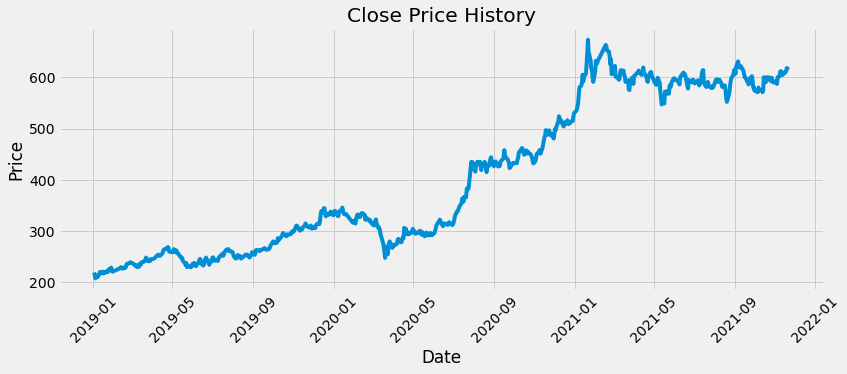

In [19]:
#畫出歷史股價走勢圖
#不能直接使用中文字型，所以用英文代替
#如何使用中文字型，請參考之前的文章或自行google
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price History')
#字斜45度角
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [20]:
#Calculate the MACD and Signal line indicators
#Calculate the short term exponential moving average (EMA)
#指數移動平均線
ShortEMA=df.Close.ewm(span=12,adjust=False).mean()
#Calculate the long term exponential moving average (EMA)
LongEMA=df.Close.ewm(span=26,adjust=False).mean()
#Calculat the MACD line
MACD=ShortEMA-LongEMA
#Calculat the Signal line
signal=MACD.ewm(span=9,adjust=False).mean()

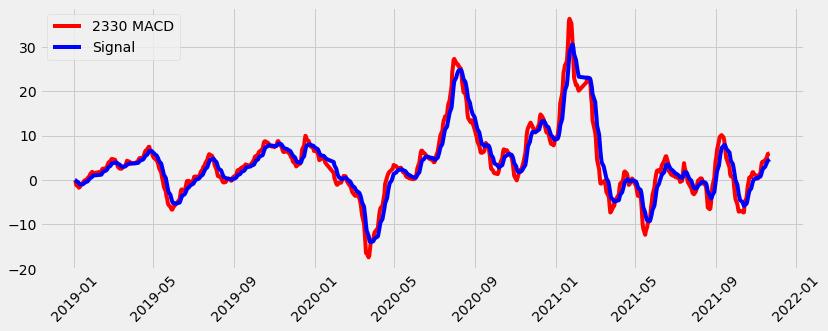

In [21]:
#畫圖
plt.figure(figsize=(12.2,4.5))
plt.xticks(rotation=45)
plt.plot(df.index , MACD, label='2330 MACD', color='red')
plt.plot(df.index , signal, label='Signal', color='Blue')
plt.legend(loc='upper left')
plt.show()

In [22]:
df['MACD']=MACD
df['Signal Line']=signal
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2019-01-02,226.5,226.5,219.0,219.5,200.950928,32900482,0.000000,0.000000
2019-01-03,214.0,218.0,214.0,215.5,197.288925,34087620,-0.319088,-0.063818
2019-01-04,211.5,211.5,206.5,208.0,190.422745,65943521,-1.163741,-0.283802
2019-01-07,212.0,214.0,211.0,213.0,195.000214,35442176,-1.413383,-0.509718
2019-01-08,212.0,212.5,210.0,211.0,193.169205,22694481,-1.752409,-0.758256


In [23]:
# create a funtion to signal when to buy and sell an asset
#買賣點的判斷，這只是一個示範，並不能實際用於買賣股票!!!
def Buy_Sell(signal):
  Buy=[]
  Sell=[]
  flag=-1

  for i in range(0,len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag !=1:
        Buy.append(signal['Close'][i])
        flag=1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag !=0:
        Sell.append(signal['Close'][i])
        flag=0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
 
  return(Buy,Sell)
      

In [24]:
a=Buy_Sell(df)
df['Buy_Signal_Price']=a[0]
df['Sell_Signal_Price']=a[1]

In [25]:
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2021-11-02,594.0,597.0,590.0,592.0,592.0,15192404,0.894041,0.421474,NaN,NaN
2021-11-03,597.0,597.0,592.0,592.0,592.0,10224009,0.794768,0.496133,NaN,NaN
2021-11-04,592.0,594.0,585.0,587.0,587.0,17932145,0.309072,0.458720,NaN,587.0
2021-11-05,598.0,600.0,595.0,600.0,600.0,33270827,0.962055,0.559387,600.0,NaN
2021-11-08,600.0,602.0,598.0,602.0,602.0,19752355,1.622233,0.771956,NaN,NaN
2021-11-09,611.0,617.0,610.0,611.0,611.0,39538660,2.838927,1.185351,NaN,NaN
2021-11-10,611.0,612.0,608.0,612.0,612.0,16027674,3.839598,1.716200,NaN,NaN
2021-11-11,600.0,606.0,600.0,606.0,606.0,18463848,4.101211,2.193202,NaN,NaN
2021-11-12,610.0,611.0,602.0,604.0,604.0,15821327,4.099896,2.574541,NaN,NaN


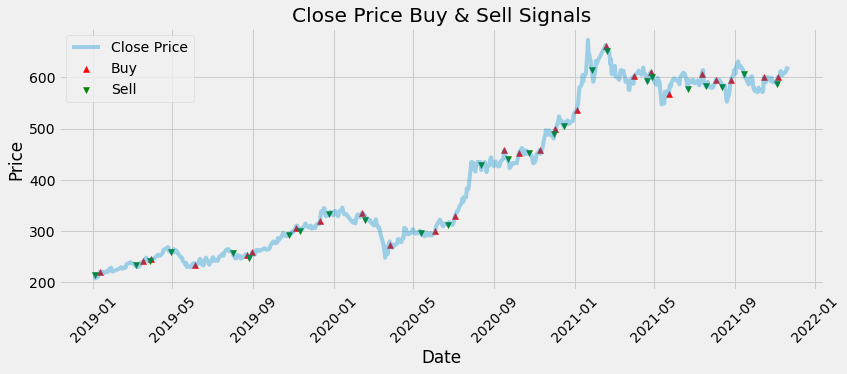

In [26]:
#Visually show the stock buy and sell signal
plt.figure(figsize=(12.2,4.5))
# ^ = shift + 6
plt.scatter(df.index,df['Buy_Signal_Price'],color='red', label='Buy',marker='^',alpha=1)
#小寫的v
plt.scatter(df.index,df['Sell_Signal_Price'],color='green', label='Sell',marker='v',alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
#字斜45度角
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()